In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio

## 2 Principal Component Analysis
### 2.1 Example Dataset
### 2.2 Implementing PCA
### 2.3 Dimensionality Reduction with PCA

In [2]:
# Part 1: Load Example Dataset
def getData(filename):
    data = sio.loadmat(filename)
    return data

In [183]:
def plotData(X):
    plt.figure()
    plt.title("Example Dataset")
    plt.scatter(X[:, 0], X[:, 1], marker = 'o', edgecolors = 'b', facecolors = '') # c/color/facecolors = '' 表示空心圆
    #plt.xticks([])   # 去掉x轴刻度,详情 help(plt.xticks)
    #plt.yticks([])   # 去掉y轴刻度，含边框
    #plt.axis('off')  # 关闭坐标轴, 没有边框
    plt.show()

In [4]:
# Before running PCA, it is important to first normalize X
def featureNormalize(X):
    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X-mu)/sigma
    return X_norm, mu, sigma


numpy 中, u, s, vh = np.linalg.svd(a), 则 a = np.dot(u, np.dot(np.diag(s), vh))

matlib 中, [U, S, V] = svd (A), 则 A = U * S * V' (注：*号表示矩阵相乘，V' 表示V的转置)

In [5]:
# Part 2: Principal Component Analysis
def pca(X):
    m = X.shape[0]
    cov = np.dot(X.T, X)/m
    u, s, vh = np.linalg.svd(cov)  # matlib中 [U,S,V]=svd(sigma), 注意返回值不同：V 与 vh 为转置关系
    return u, s

In [98]:
def plotEigenvectors(u, X, mu):
    plt.figure(figsize = (5, 5))
    plt.title("Computed eigenvectors of the dataset")
    plt.scatter(X[:, 0], X[:, 1], marker = 'o', edgecolors = 'b', c = '')
    plt.plot(X[:, 0], (u[1,0]/u[0,0])*(X[:,0]-mu[0]) + mu[1], 'k-', linewidth = '0.6')
    plt.plot(X[:, 0], (u[1,1]/u[0,1])*(X[:,0]-mu[0]) + mu[1], 'k-', linewidth = '0.6')
    plt.xlim(0.5, 6.5)
    plt.ylim(2, 8)
    plt.show()

- 2.3.1 Projecting the data onto the principal components

In [30]:
# Part 3: Dimension Reduction
def projectData(X, u, K):
    Z = np.dot(X, u[:, :K])
    return Z

- 2.3.2 Reconstructing an approximation of the data

In [76]:
def recoverData(Z, u, K):
    X_rec = np.dot(Z, u[:, :K].T)
    return X_rec

- 2.3.3 Visualizing the projections

In [99]:
def plotProject(X, X_rec):
    plt.figure(figsize = (5, 5))
    plt.title("The normalized and projected data after PCA")
    plt.scatter(X[:, 0], X[:, 1], marker = 'o', edgecolors = 'b', c = '')
    plt.scatter(X_rec[:, 0], X_rec[:, 1], marker = 'o', edgecolors = 'r', c = '')
    for i in range(X.shape[0]):
        plt.plot([X[i,0], X_rec[i,0]], [X[i,1], X_rec[i,1]], 'k--')
    plt.axis([-3, 3, -3, 3])          # 设置x轴和y轴刻度范围
    plt.show()

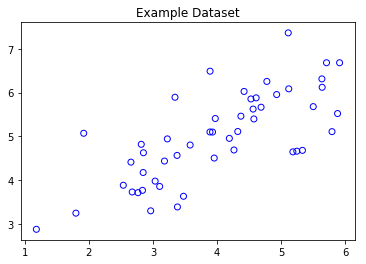

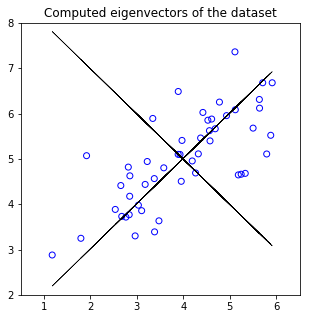

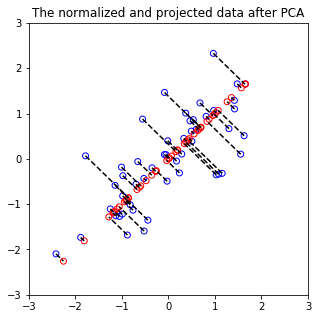

In [184]:
#def main():
data = getData("ex7data1.mat")
X = data['X']
#X = np.around(data['X'], decimals = 4)
plotData(X)
X_norm, mu, sigma = featureNormalize(X)
u, s = pca(X_norm)
plotEigenvectors(u, X, mu)
Z = projectData(X_norm, u, 1)
X_rec = recoverData(Z, u, 1)
plotProject(X_norm, X_rec)

### 2.4 Face Image Dataset

In [105]:
# Part 4: Loading and Visualizing Face Data (100 of these face images)
facedata = sio.loadmat("ex7faces.mat")
Xface = facedata['X']
print(Xface.shape, Xface.min(), Xface.max())

(5000, 1024) -127.8663138671875 127.1336861328125


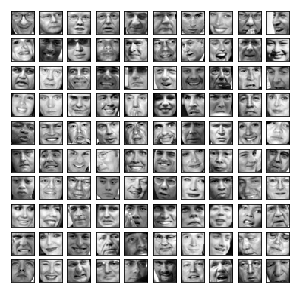

In [212]:
# Visualizing the first 100 of these face images
idx = np.random.randint(0, 5000, 100)
plt.figure(figsize = (5, 5))
for i in range(100):
    im = Xface[i, :].reshape((32, 32), order = "F")
    plt.subplot(10, 10, i+1)
    plt.imshow(im, cmap = 'gray')
    plt.xticks([])   # 去掉x轴刻度,详情 help(plt.xticks)
    plt.yticks([])   # 去掉y轴刻度，含边框
    #plt.axis('off')
plt.savefig("face100.png")

#plt.xticks([])   # 去掉x轴刻度,详情 help(plt.xticks)
#plt.yticks([])   # 去掉y轴刻度，含边框
#plt.axis('off')   # 关闭坐标轴, 没有边框 [注意，类似的这些操作若想起作用，需要将其置于 plt.show() 之前，plt.imshow() 之后]
#plt.imshow(im, cmap = 'gray')  # 或 cmap = plt.cm.gray
#plt.axis('off')
#plt.savefig("face.jpg")


Possible **colormap(cmap) values** are: Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, inferno, inferno_r, jet, jet_r, magma, magma_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, viridis, viridis_r, winter, winter_r